# Homework 10: Phân vùng ảnh (Image Segmentation)

Tổng quan: Ở bài tập này chúng ta sẽ luyện tập thuật toán phân vùng ảnh sử dụng đa ngưỡng Kmeans, Meanshift để thực hiện phân đoạn ảnh. Bài tập còn yêu cầu vẽ ra các ảnh kết quả với các tham số khác nhau, vẽ kết quả hàm mục tiêu của Kmean và những yêu cầu khác

In [4]:
from sklearn.cluster import MeanShift, KMeans
from IPython.display import Image
from skimage.filters import threshold_multiotsu

import warnings
warnings.filterwarnings("ignore")
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Câu hỏi 1: Phân vùng ảnh Meanshift


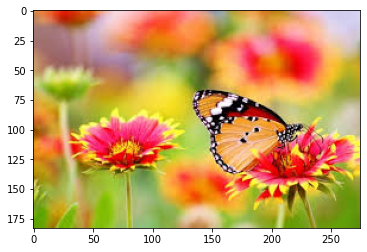

In [45]:
img = cv2.imread('img1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Câu hỏi 1.1. Phân đoạn ảnh sử dụng Meanshift (giống bài thực hành trên lớp)

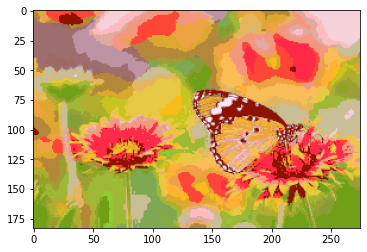

In [46]:
def init_seed(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

X = img.reshape((-1, 3))
#print(X.shape)
random_seeds = init_seed(X, 30)

ms = MeanShift(bandwidth=1, seeds=random_seeds)
ms.fit(X)
center = ms.cluster_centers_
label = ms.labels_

segmented_image = center[label]
segmented_image = np.reshape(segmented_image, img.shape)
plt.imshow(segmented_image/255.0)
plt.show()

Hãy thực hiện tính toán kết quả phân loại Meanshift với tham số bandwidth khác nhau 2,5,10,20,50. Vẽ kết quả phân loại ra màn hình (3 hàng, 2 cột) bao gồm ảnh gốc và 5 ảnh phân loại với bandwidth khác nhau
Gợi ý: dùng subplot để vẽ nhiều hình cũng như hàm for để vẽ hình với các tham số khác nhau

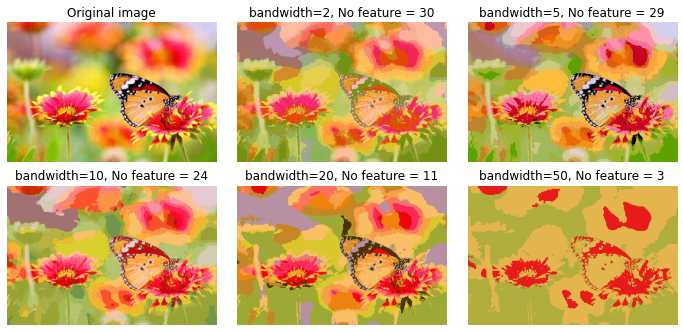

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
bandwidth = [2,5,10,20,50]

ax[0][0].imshow(img)
ax[0][0].set_title("Original image")
ax[0][0].axis('off')

count1=1
for k in bandwidth:
    #### YOUR CODE HERE ####
    pass
    #### END YOUR CODE #####

#plt.subplots_adjust()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

## Câu hỏi 2: Phân vùng ảnh dựa trên Kmean
Trước hết, hãy phân vùng ảnh thành 2 vùng riếng biệt

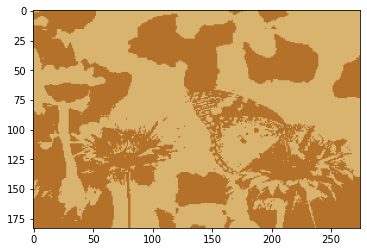

In [54]:
# Chuyển thành số thực
X_float = np.float32(X)

#Đưa ra tiêu chí để làm giảm độ phức tạp tính toán
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2
_, labels, (centers) = cv2.kmeans(X_float, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Chuyển trở lại thành ảnh 8-bit
centers = np.uint8(centers)

# Tính toán ảnh phân loại
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)
# Hiển thị ảnh
plt.imshow(segmented_image)
plt.show()

Hãy thực hiện phân đoạn ảnh bằng Kmean với số vùng lần lượt là 2,4,6,8,10. Vẽ ảnh gốc và các ảnh phân đoạn ra màn hình (khung 2x2) giống như đã làm với Meanshift

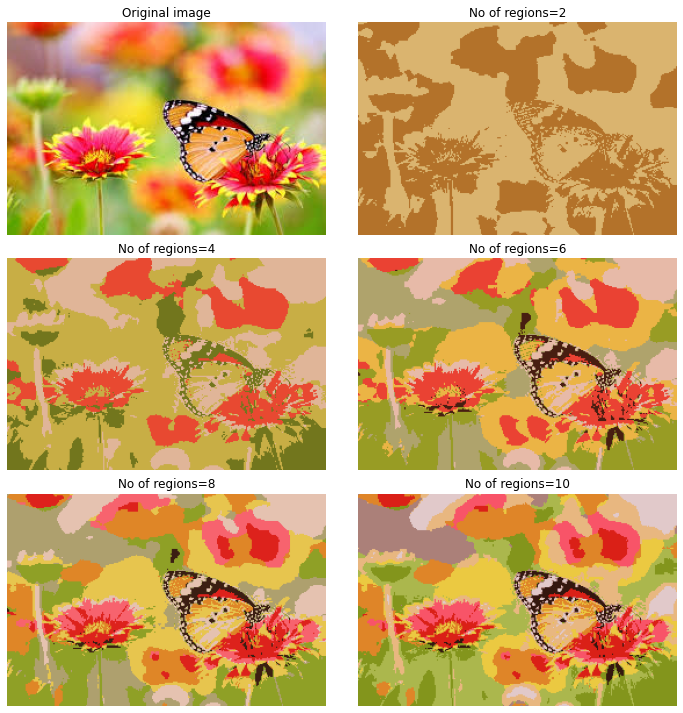

In [56]:
# Chuyển thành số thực
X_float = np.float32(X)
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 13))
noRegion = [2,4,6,8,10]

ax[0][0].imshow(img)
ax[0][0].set_title("Original image")
ax[0][0].axis('off')

count1=1
for k in noRegion:
    #### YOUR CODE HERE ####
    pass
    #### END YOUR CODE #####

#plt.subplots_adjust()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

Hãy thực hiện vẽ hàm mục tiêu của Kmean với số miền chạy từ 2 đến 15 để xem số miền nào là phù hợp
Gợi ý: Hãy kiểm tra hàm kmeans của cv2 để biết thông số hàm mục tiêu, sau đó hãy vẽ thông số hàm mục tiêu ra màn hình ứng với số miền tương ứng ròi vẽ ra màn hình

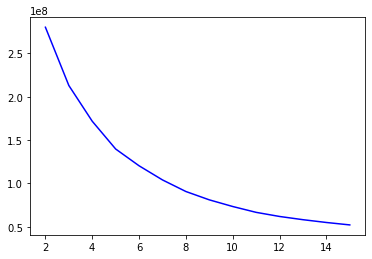

In [58]:
X_float = np.float32(X)
noRegion = range(2,16)

objective = []
for k in noRegion:
    #### YOUR CODE HERE ####
    pass
    #### END YOUR CODE #####
    
#### YOUR CODE TO DRAW HERE ####
pass
#### END YOUR TO DRAW CODE #####    
plt.show()

## Câu hỏi 3: So sánh phân đoạn đặc trưng 3D và 5D
Với hàm đặc trưng 5D đã được xây dựng từ bài tập trên lớp, hãy viết đoạn code so sánh phân đoạn ảnh giữa đặc trưng 3D và 5D

In [60]:
def get_5D_vector(img):
    X = None
    X_pos = np.zeros((img.shape[0], img.shape[1], 2))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            X_pos[i][j][0] = i
            X_pos[i][j][1] = j
    X = img.reshape((-1, 3))
    X_pos = X_pos.reshape((-1, 2))

    X = np.concatenate((X, X_pos), axis=1)
    return X

Hãy so sánh phân đoạn ảnh dùng đặc trưng 3D và 5D với các kích thước khác nhau (10,20,40,60,80) bằng Meanshift. Hình vẽ 3 hàng, 2 cột, bên trái là phân đoạn dùng dặc trưng 3D và bên phải dùng đặc trưng 5D

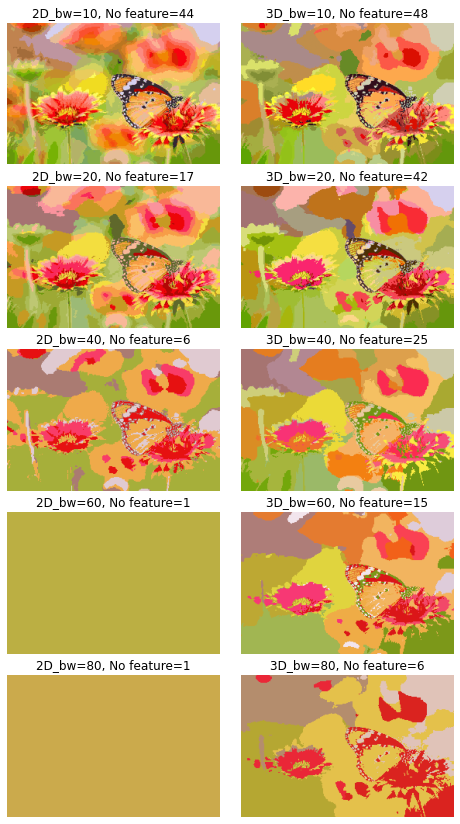

In [86]:
X = img.reshape((-1, 3))
X5 = get_5D_vector(img)

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8, 15))
bandwidth = [10,20,40,60,80]

i=0
for k in bandwidth:
    #### YOUR CODE HERE ####
    pass
    #### END YOUR CODE #####

#plt.subplots_adjust()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()